In [52]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import datetime as dt
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the cleaned HPI csv data and assign to a dataframe with date as index
csv = Path("clean_data/top20_1975_2019.csv")
df = pd.read_csv(csv)
df.head()

,GeoFips,MSA,Year,Population,Personal Income,Number Jobs,HPI
0,12580,"Baltimore-Columbia-Towson, MD",1975,2184332,14987764,1038096,27.319167
1,12580,"Baltimore-Columbia-Towson, MD",1976,2188964,16344005,1040323,29.631667
2,12580,"Baltimore-Columbia-Towson, MD",1977,2201877,17827450,1068371,32.359167
3,12580,"Baltimore-Columbia-Towson, MD",1978,2204362,19889912,1108082,35.471667
4,12580,"Baltimore-Columbia-Towson, MD",1979,2209160,21951910,1139209,39.037500


In [29]:
csv1 = Path("clean_data/top20_hpi_monthly_full.csv")
df1 = pd.read_csv(csv1)
df1.head()

,MSA,Year,HPI
0,"Baltimore-Columbia-Towson, MD",1975-01-31,26.81
1,"Baltimore-Columbia-Towson, MD",1975-02-28,26.79
2,"Baltimore-Columbia-Towson, MD",1975-03-31,26.77
3,"Baltimore-Columbia-Towson, MD",1975-04-30,26.78
4,"Baltimore-Columbia-Towson, MD",1975-05-31,26.85


In [30]:
df1['Year'] = pd.to_datetime(df1['Year'])
df1.head()

,MSA,Year,HPI
0,"Baltimore-Columbia-Towson, MD",1975-01-31,26.81
1,"Baltimore-Columbia-Towson, MD",1975-02-28,26.79
2,"Baltimore-Columbia-Towson, MD",1975-03-31,26.77
3,"Baltimore-Columbia-Towson, MD",1975-04-30,26.78
4,"Baltimore-Columbia-Towson, MD",1975-05-31,26.85


In [33]:
df1.index = df1['Year']
df1.drop(columns='Year')

,MSA,HPI
Year,,
1975-01-31,"Baltimore-Columbia-Towson, MD",26.81
1975-02-28,"Baltimore-Columbia-Towson, MD",26.79
1975-03-31,"Baltimore-Columbia-Towson, MD",26.77
1975-04-30,"Baltimore-Columbia-Towson, MD",26.78
1975-05-31,"Baltimore-Columbia-Towson, MD",26.85
1975-06-30,"Baltimore-Columbia-Towson, MD",27.03
1975-07-31,"Baltimore-Columbia-Towson, MD",27.27
1975-08-31,"Baltimore-Columbia-Towson, MD",27.51
1975-09-30,"Baltimore-Columbia-Towson, MD",27.70


In [3]:
# check for nulls in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
GeoFips            900 non-null int64
MSA                900 non-null object
Year               900 non-null int64
Population         900 non-null int64
Personal Income    900 non-null int64
Number Jobs        900 non-null int64
HPI                900 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 49.3+ KB


In [4]:
df_ny = df.loc[df['MSA']== "New York-Newark-Jersey City, NY-NJ-PA"]

In [35]:
df_ny1 = df1.loc[df1['MSA']== "New York-Newark-Jersey City, NY-NJ-PA"]

In [5]:
df_ny['Year'] = pd.date_range(start='1/1975', periods=len(df_ny), freq='Y')
df_ny.index = df_ny['Year']
df_ny.index=pd.to_datetime(df_ny.index).year
df_ny = df_ny.drop(columns='Year')

In [6]:
df_ny.head()

,GeoFips,MSA,Population,Personal Income,Number Jobs,HPI
Year,,,,,,
1975,35620,"New York-Newark-Jersey City, NY-NJ-PA",16778386,127505633,7718680,19.952500
1976,35620,"New York-Newark-Jersey City, NY-NJ-PA",16712756,135572917,7696630,20.283333
1977,35620,"New York-Newark-Jersey City, NY-NJ-PA",16584115,146764176,7778853,21.248333
1978,35620,"New York-Newark-Jersey City, NY-NJ-PA",16468444,160679003,7991342,22.868333
1979,35620,"New York-Newark-Jersey City, NY-NJ-PA",16400125,175867875,8177740,24.994167


In [7]:
df_la = df.loc[df['MSA']== "Los Angeles-Long Beach-Anaheim, CA"]

In [8]:
df_la['Year'] = pd.date_range(start='1/1975', periods=len(df_la), freq='Y')
df_la.index = df_la['Year']
df_la.index=pd.to_datetime(df_la.index).year
df_la = df_la.drop(columns='Year')

In [9]:
df_la.head()

,GeoFips,MSA,Population,Personal Income,Number Jobs,HPI
Year,,,,,,
1975,31080,"Los Angeles-Long Beach-Anaheim, CA",8842499,64589683,4367984,17.063333
1976,31080,"Los Angeles-Long Beach-Anaheim, CA",8984368,71531619,4520496,20.223333
1977,31080,"Los Angeles-Long Beach-Anaheim, CA",9063784,79408612,4733736,25.610833
1978,31080,"Los Angeles-Long Beach-Anaheim, CA",9204893,90398475,5044872,30.272500
1979,31080,"Los Angeles-Long Beach-Anaheim, CA",9292983,102138575,5314599,35.476667


In [10]:
df_chi = df.loc[df['MSA']== "Chicago-Naperville-Elgin, IL-IN-WI"]

In [11]:
df_chi['Year'] = pd.date_range(start='1/1975', periods=len(df_chi), freq='Y')
df_chi.index = df_chi['Year']
df_chi.index=pd.to_datetime(df_chi.index).year
df_chi = df_chi.drop(columns='Year')

In [12]:
df_chi.head()

,GeoFips,MSA,Population,Personal Income,Number Jobs,HPI
Year,,,,,,
1975,16980,"Chicago-Naperville-Elgin, IL-IN-WI",7988641,58433668,3831128,23.725000
1976,16980,"Chicago-Naperville-Elgin, IL-IN-WI",8014978,64192731,3918359,26.237500
1977,16980,"Chicago-Naperville-Elgin, IL-IN-WI",8047518,71017879,4032483,29.528333
1978,16980,"Chicago-Naperville-Elgin, IL-IN-WI",8067880,78718037,4165078,34.009167
1979,16980,"Chicago-Naperville-Elgin, IL-IN-WI",8055256,86307014,4212288,36.594167


In [13]:
df_dfw = df.loc[df['MSA']== "Dallas-Fort Worth-Arlington, TX"]

In [14]:
df_dfw['Year'] = pd.date_range(start='1/1975', periods=len(df_dfw), freq='Y')
df_dfw.index = df_dfw['Year']
df_dfw.index=pd.to_datetime(df_dfw.index).year
df_dfw = df_dfw.drop(columns='Year')

In [15]:
df_dfw.head()

,GeoFips,MSA,Population,Personal Income,Number Jobs,HPI
Year,,,,,,
1975,19100,"Dallas-Fort Worth-Arlington, TX",2654603,17609865,1366632,32.370000
1976,19100,"Dallas-Fort Worth-Arlington, TX",2723580,19663563,1424689,33.928333
1977,19100,"Dallas-Fort Worth-Arlington, TX",2775384,22002447,1505789,37.049167
1978,19100,"Dallas-Fort Worth-Arlington, TX",2841618,25560202,1610676,42.821667
1979,19100,"Dallas-Fort Worth-Arlington, TX",2924299,29642682,1710438,51.321667


In [16]:
df_hou = df.loc[df['MSA']== "Houston-The Woodlands-Sugar Land, TX"]

In [17]:
df_hou['Year'] = pd.date_range(start='1/1975', periods=len(df_hou), freq='Y')
df_hou.index = df_hou['Year']
df_hou.index=pd.to_datetime(df_hou.index).year
df_hou = df_hou.drop(columns='Year')

In [18]:
df_hou.head()

,GeoFips,MSA,Population,Personal Income,Number Jobs,HPI
Year,,,,,,
1975,26420,"Houston-The Woodlands-Sugar Land, TX",2587627,18149058,1336396,34.545000
1976,26420,"Houston-The Woodlands-Sugar Land, TX",2696239,20806358,1417454,38.979167
1977,26420,"Houston-The Woodlands-Sugar Land, TX",2800536,23738842,1511549,44.008333
1978,26420,"Houston-The Woodlands-Sugar Land, TX",2915493,28053834,1631614,50.374167
1979,26420,"Houston-The Woodlands-Sugar Land, TX",3032641,32753401,1734505,57.190000


_________________________________________________________________________________

In [ ]:
# linear reg with lagged hpi

In [101]:
df_ny['Lagged_HPI'] = df_ny['HPI'].shift()
df_ny.dropna(inplace=True)

In [102]:
size = int(len(df_ny)*0.8)

train, test = df_ny.iloc[:size], df_ny.iloc[size:]

In [103]:
X_train = train[['Population','Personal Income','Number Jobs']]
X_test = test[['Population','Personal Income','Number Jobs']]
Y_train = train['HPI']
Y_test = test['HPI']

In [104]:
X_train1 = train['Lagged_HPI'].to_frame()
X_test1 = test['Lagged_HPI'].to_frame()
Y_train1 = train['HPI']
Y_test1 = test['HPI']

In [105]:
X_train1.dropna(inplace=True)

In [106]:
X_train.tail()

,Population,Personal Income,Number Jobs
Year,,,
2006,18538752,935138611,10720893
2007,18572325,1008722284,11017676
2008,18672355,1024525568,11117086
2009,18800157,994467589,10893447
2010,18923407,1033820797,10924348


In [107]:
model = LinearRegression()

In [108]:
model1 = LinearRegression()

In [109]:
model.fit(X_train,Y_train)

LinearRegression()

In [110]:
model1.fit(X_train1,Y_train1)

LinearRegression()

In [111]:
predictions = model.predict(X_test)

In [112]:
predictions1 = model1.predict(X_test1)

In [113]:
Results1 = Y_test1.to_frame()
Results1['Predictions'] = predictions1

In [114]:
Results = Y_test.to_frame()
Results['Predictions'] = predictions

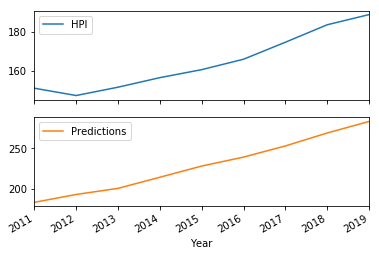

In [115]:
Results[:20].plot(subplots=True);

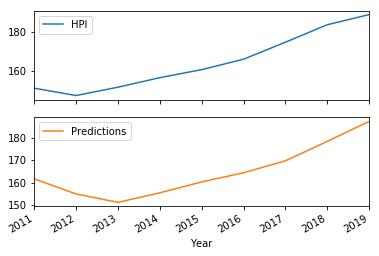

In [116]:
Results1[:20].plot(subplots=True);

In [117]:
MSE = mean_squared_error(
    Results['HPI'],
    Results['Predictions']
)
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!
out_of_sample_RSME = np.sqrt(MSE)
print(f'Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_RSME}')

Out-of-Sample Root Mean Squared Error (RMSE): 67.54990934030013


In [118]:
MSE = mean_squared_error(
    Results1['HPI'],
    Results1['Predictions']
)
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!
out_of_sample_RSME = np.sqrt(MSE)
print(f'Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_RSME}')

Out-of-Sample Root Mean Squared Error (RMSE): 5.002794888504403


In [119]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!
in_sample_results = Y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_mse = mean_squared_error(
    in_sample_results["HPI"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 13.898399465554501


In [120]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!
in_sample_results1 = Y_train1.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!
in_sample_results1["In-sample Predictions"] = model1.predict(X_train1)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_mse1 = mean_squared_error(
    in_sample_results1["HPI"],
    in_sample_results1["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
in_sample_rmse1 = np.sqrt(in_sample_mse1)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse1}")

In-sample Root Mean Squared Error (RMSE): 7.372876199663234


In [ ]:
score = model.score(X_train,Y_train)
r2 = r2_score(Y_test, predictions)

In [ ]:
score1 = model1.score(X_train1,Y_train1)
r21 = r2_score(Y_test1, predictions1)

In [ ]:
print(f"Score: {score}, r2: {r2}")

In [ ]:
print(f"Score: {score1}, r2: {r21}")

In [ ]:
 # Mean Squared Error
mse = mean_squared_error(y, predictions)
mse

In [ ]:
 # Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

In [ ]:
# Standard deviation of the temperature
np.std(y)

____________________________________

In [ ]:
# TS forecast

In [36]:
ts = df_ny1['HPI']
ts.head(10)

Year
1975-01-31    20.25
1975-02-28    19.81
1975-03-31    19.57
1975-04-30    19.55
1975-05-31    19.64
1975-06-30    19.80
1975-07-31    20.02
1975-08-31    20.17
1975-09-30    20.20
1975-10-31    20.18
Name: HPI, dtype: float64

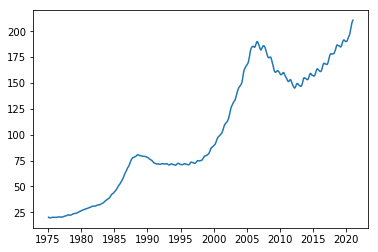

In [37]:
plt.plot(ts)

In [40]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = sts.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

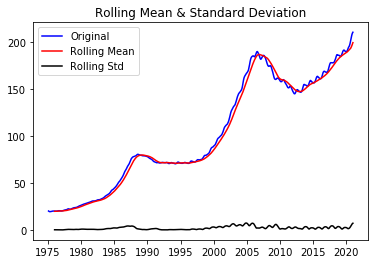

Results of Dickey-Fuller Test:
Test Statistic                   0.263971
p-value                          0.975630
#Lags Used                      19.000000
Number of Observations Used    532.000000
Critical Value (1%)             -3.442702
Critical Value (5%)             -2.866988
Critical Value (10%)            -2.569672
dtype: float64


In [41]:
test_stationarity(ts)

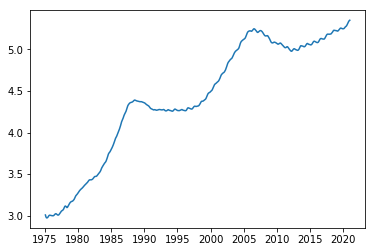

In [46]:
ts_log = np.log(ts)
plt.plot(ts_log)

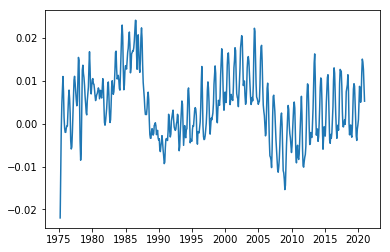

In [47]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

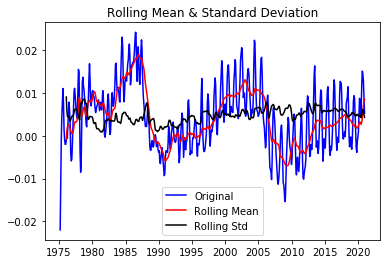

Results of Dickey-Fuller Test:
Test Statistic                  -3.021260
p-value                          0.032956
#Lags Used                      18.000000
Number of Observations Used    532.000000
Critical Value (1%)             -3.442702
Critical Value (5%)             -2.866988
Critical Value (10%)            -2.569672
dtype: float64


In [48]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

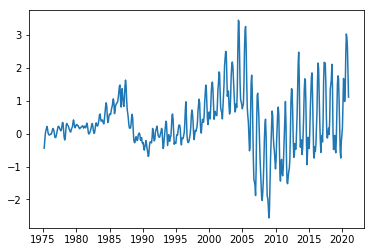

In [49]:
ts_diff = ts - ts.shift()
plt.plot(ts_diff)

In [50]:
ts_diff.dropna(inplace=True)

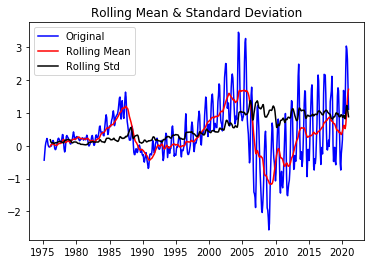

Results of Dickey-Fuller Test:
Test Statistic                  -2.586152
p-value                          0.095893
#Lags Used                      18.000000
Number of Observations Used    532.000000
Critical Value (1%)             -3.442702
Critical Value (5%)             -2.866988
Critical Value (10%)            -2.569672
dtype: float64


In [51]:
test_stationarity(ts_diff)

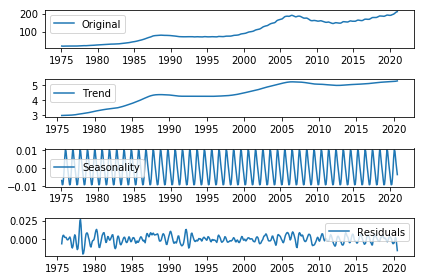

In [55]:
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

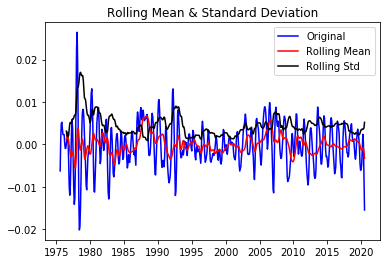

Results of Dickey-Fuller Test:
Test Statistic                  -5.094304
p-value                          0.000014
#Lags Used                      16.000000
Number of Observations Used    523.000000
Critical Value (1%)             -3.442915
Critical Value (5%)             -2.867082
Critical Value (10%)            -2.569722
dtype: float64


In [56]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

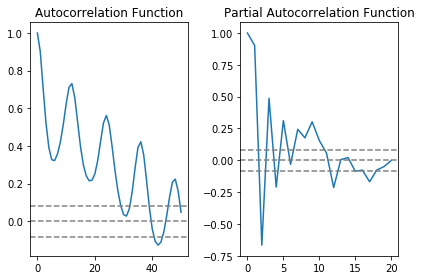

In [62]:
lag_acf = sts.acf(ts_log_diff, nlags=50)
lag_pacf = sts.pacf(ts_log_diff, nlags=20, method='ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

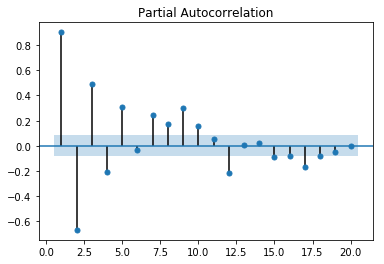

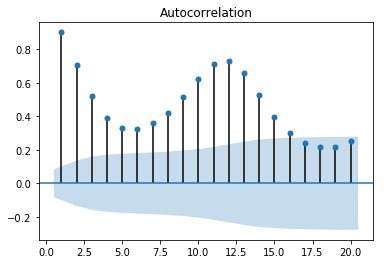

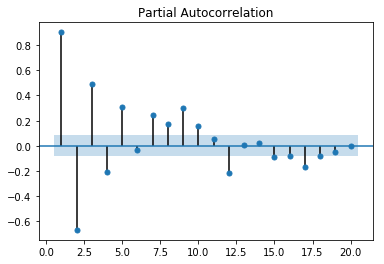

In [60]:
sgt.plot_acf(ts_log_diff, lags=20, zero=False)
sgt.plot_pacf(ts_log_diff, lags=20, method='ols', zero=False)

Text(0.5, 1.0, 'RSS: 0.0091')

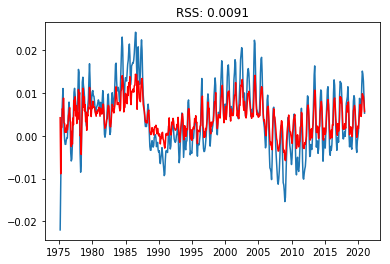

In [65]:
model011 = ARIMA(ts_log, order=(0,1,1))
results011 = model011.fit()
plt.plot(ts_log_diff)
plt.plot(results011.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results011.fittedvalues-ts_log_diff)**2))

In [66]:
results011.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(0, 1, 1)   Log Likelihood                2262.048
Method:                       css-mle   S.D. of innovations              0.004
Date:                Sat, 12 Jun 2021   AIC                          -4518.095
Time:                        09:36:16   BIC                          -4505.160
Sample:                    02-28-1975   HQIC                         -4513.041
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0042      0.000     12.523      0.000       0.004       0.005
ma.L1.D.HPI     0.9999      0.005    197.593      0.000       0.990       1.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0001           +0.0000j            1.0001            0.5000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 0.0059')

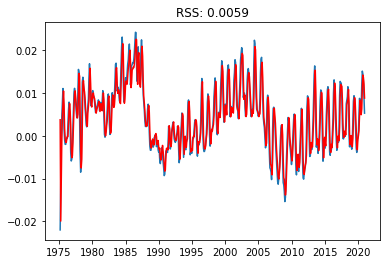

In [67]:
model110 = ARIMA(ts_log, order=(1,1,0))
results110 = model110.fit()
plt.plot(ts_log_diff)
plt.plot(results110.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results110.fittedvalues-ts_log_diff)**2))

In [68]:
results110.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2397.586
Method:                       css-mle   S.D. of innovations              0.003
Date:                Sat, 12 Jun 2021   AIC                          -4789.172
Time:                        09:37:54   BIC                          -4776.237
Sample:                    02-28-1975   HQIC                         -4784.118
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0037      0.002      2.304      0.021       0.001       0.007
ar.L1.D.HPI     0.9199      0.017     52.601      0.000       0.886       0.954
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0871           +0.0000j            1.0871            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 0.0022')

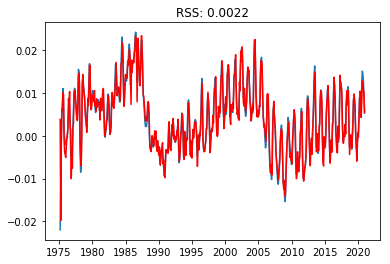

In [72]:
model515 = ARIMA(ts_log, order=(5,1,5))
results515 = model515.fit()
plt.plot(ts_log_diff)
plt.plot(results515.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results515.fittedvalues-ts_log_diff)**2))

In [70]:
results515.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(5, 1, 5)   Log Likelihood                2747.983
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sat, 12 Jun 2021   AIC                          -5471.966
Time:                        09:39:18   BIC                          -5420.225
Sample:                    02-28-1975   HQIC                         -5451.748
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0038      0.003      1.451      0.147      -0.001       0.009
ar.L1.D.HPI     3.0981      0.032     95.744      0.000       3.035       3.161
ar.L2.D.HPI    -3.8492      0.068    -56.436      0.000      -3.983      -3.716
ar.L3.D.HPI     2.3083        nan        nan        nan         nan         nan
ar.L4.D.HPI    -0.6636        nan        nan        nan         nan         nan
ar.L5.D.HPI     0.1027        nan        nan        nan         nan         nan
ma.L1.D.HPI    -1.2242      0.050    -24.243      0.000      -1.323      -1.125
ma.L2.D.HPI    -0.4039      0.052     -7.768      0.000      -0.506      -0.302
ma.L3.D.HPI     1.0258      0.047     21.626      0.000       0.933       1.119
ma.L4.D.HPI     0.0105      0.062      0.171      0.865      -0.110       0.131
ma.L5.D.HPI    -0.2559      0.026     -9.692      0.000      -0.308      -0.204
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8695           -0.5008j            1.0034           -0.0832
AR.2            0.8695           +0.5008j            1.0034            0.0832
AR.3            1.0199           -0.0000j            1.0199           -0.0000
AR.4            1.8510           -2.4607j            3.0792           -0.1474
AR.5            1.8510           +2.4607j            3.0792            0.1474
MA.1            0.9245           -0.4771j            1.0404           -0.0758
MA.2            0.9245           +0.4771j            1.0404            0.0758
MA.3            1.3745           -0.0000j            1.3745           -0.0000
MA.4           -1.5912           -0.3075j            1.6206           -0.4696
MA.5           -1.5912           +0.3075j            1.6206            0.4696
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 0.0021')

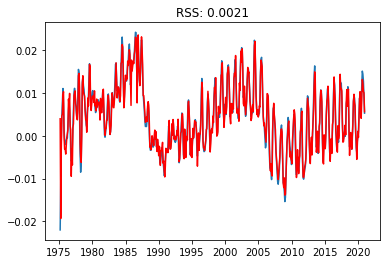

In [73]:
model514 = ARIMA(ts_log, order=(5,1,4))
results514 = model514.fit()
plt.plot(ts_log_diff)
plt.plot(results514.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results514.fittedvalues-ts_log_diff)**2))

In [74]:
results514.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(5, 1, 4)   Log Likelihood                2752.455
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sat, 12 Jun 2021   AIC                          -5482.911
Time:                        09:42:03   BIC                          -5435.482
Sample:                    02-28-1975   HQIC                         -5464.378
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0040      0.002      2.487      0.013       0.001       0.007
ar.L1.D.HPI     3.3877      0.108     31.466      0.000       3.177       3.599
ar.L2.D.HPI    -4.9856      0.301    -16.549      0.000      -5.576      -4.395
ar.L3.D.HPI     4.0289      0.336     11.999      0.000       3.371       4.687
ar.L4.D.HPI    -1.8698      0.180    -10.390      0.000      -2.223      -1.517
ar.L5.D.HPI     0.4317      0.045      9.580      0.000       0.343       0.520
ma.L1.D.HPI    -1.5031      0.124    -12.089      0.000      -1.747      -1.259
ma.L2.D.HPI     0.2050      0.139      1.479      0.139      -0.067       0.477
ma.L3.D.HPI     0.8162      0.100      8.136      0.000       0.620       1.013
ma.L4.D.HPI    -0.3445      0.104     -3.313      0.001      -0.548      -0.141
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0377           -0.0000j            1.0377           -0.0000
AR.2            0.8740           -0.5020j            1.0080           -0.0830
AR.3            0.8740           +0.5020j            1.0080            0.0830
AR.4            0.7728           -1.2649j            1.4823           -0.1627
AR.5            0.7728           +1.2649j            1.4823            0.1627
MA.1           -1.3911           -0.0000j            1.3911           -0.5000
MA.2            0.9329           -0.4807j            1.0495           -0.0757
MA.3            0.9329           +0.4807j            1.0495            0.0757
MA.4            1.8943           -0.0000j            1.8943           -0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 0.0022')

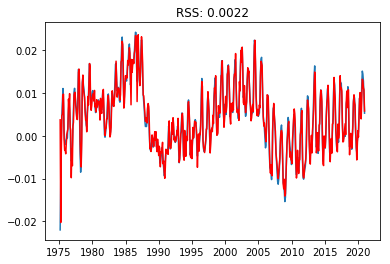

In [75]:
model513 = ARIMA(ts_log, order=(5,1,3))
results513 = model513.fit()
plt.plot(ts_log_diff)
plt.plot(results513.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results513.fittedvalues-ts_log_diff)**2))

In [76]:
results513.summary() ## best so far

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(5, 1, 3)   Log Likelihood                2743.429
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sat, 12 Jun 2021   AIC                          -5466.859
Time:                        09:43:53   BIC                          -5423.741
Sample:                    02-28-1975   HQIC                         -5450.011
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0037      0.003      1.471      0.141      -0.001       0.009
ar.L1.D.HPI     2.9682      0.063     47.213      0.000       2.845       3.091
ar.L2.D.HPI    -3.7402      0.206    -18.196      0.000      -4.143      -3.337
ar.L3.D.HPI     2.6020      0.284      9.175      0.000       2.046       3.158
ar.L4.D.HPI    -1.1513      0.199     -5.773      0.000      -1.542      -0.760
ar.L5.D.HPI     0.3136      0.061      5.176      0.000       0.195       0.432
ma.L1.D.HPI    -1.0364      0.056    -18.537      0.000      -1.146      -0.927
ma.L2.D.HPI    -0.2779      0.099     -2.797      0.005      -0.473      -0.083
ma.L3.D.HPI     0.6084      0.050     12.179      0.000       0.510       0.706
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0291           -0.0000j            1.0291           -0.0000
AR.2            0.8814           -0.5084j            1.0175           -0.0833
AR.3            0.8814           +0.5084j            1.0175            0.0833
AR.4            0.4396           -1.6732j            1.7300           -0.2091
AR.5            0.4396           +1.6732j            1.7300            0.2091
MA.1           -1.4675           -0.0000j            1.4675           -0.5000
MA.2            0.9621           -0.4410j            1.0583           -0.0684
MA.3            0.9621           +0.4410j            1.0583            0.0684
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 0.0024')

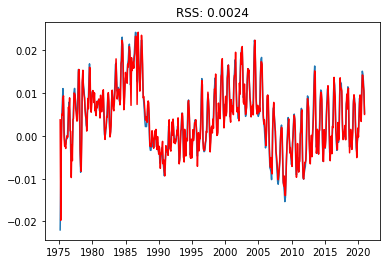

In [77]:
model512 = ARIMA(ts_log, order=(5,1,2))
results512 = model512.fit()
plt.plot(ts_log_diff)
plt.plot(results512.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results512.fittedvalues-ts_log_diff)**2))

In [78]:
results512.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(5, 1, 2)   Log Likelihood                2711.480
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sat, 12 Jun 2021   AIC                          -5404.960
Time:                        09:46:19   BIC                          -5366.155
Sample:                    02-28-1975   HQIC                         -5389.797
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0037      0.002      1.504      0.133      -0.001       0.009
ar.L1.D.HPI     2.2046      0.078     28.277      0.000       2.052       2.357
ar.L2.D.HPI    -1.9499      0.210     -9.293      0.000      -2.361      -1.539
ar.L3.D.HPI     1.0084      0.257      3.926      0.000       0.505       1.512
ar.L4.D.HPI    -0.4828      0.178     -2.707      0.007      -0.832      -0.133
ar.L5.D.HPI     0.2119      0.060      3.508      0.000       0.094       0.330
ma.L1.D.HPI    -0.1773      0.075     -2.376      0.018      -0.324      -0.031
ma.L2.D.HPI    -0.5371      0.069     -7.811      0.000      -0.672      -0.402
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0170           -0.0000j            1.0170           -0.0000
AR.2            0.9656           -0.6554j            1.1670           -0.0949
AR.3            0.9656           +0.6554j            1.1670            0.0949
AR.4           -0.3349           -1.8151j            1.8457           -0.2790
AR.5           -0.3349           +1.8151j            1.8457            0.2790
MA.1            1.2094           +0.0000j            1.2094            0.0000
MA.2           -1.5395           +0.0000j            1.5395            0.5000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 0.0022')

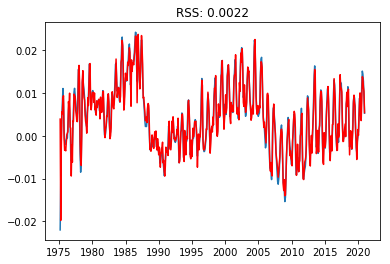

In [79]:
model415 = ARIMA(ts_log, order=(4,1,5))
results415 = model415.fit()
plt.plot(ts_log_diff)
plt.plot(results415.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results415.fittedvalues-ts_log_diff)**2))

In [80]:
results415.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(4, 1, 5)   Log Likelihood                2735.209
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sat, 12 Jun 2021   AIC                          -5448.419
Time:                        09:47:55   BIC                          -5400.990
Sample:                    02-28-1975   HQIC                         -5429.886
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0039      0.002      2.036      0.042       0.000       0.008
ar.L1.D.HPI     1.7196      0.127     13.499      0.000       1.470       1.969
ar.L2.D.HPI    -0.1771      0.325     -0.545      0.586      -0.814       0.460
ar.L3.D.HPI    -1.3276      0.308     -4.310      0.000      -1.931      -0.724
ar.L4.D.HPI     0.7658      0.110      6.987      0.000       0.551       0.981
ma.L1.D.HPI     0.2239      0.135      1.658      0.097      -0.041       0.489
ma.L2.D.HPI    -1.3840      0.089    -15.471      0.000      -1.559      -1.209
ma.L3.D.HPI    -0.1935      0.137     -1.414      0.157      -0.462       0.075
ma.L4.D.HPI     0.6950      0.072      9.668      0.000       0.554       0.836
ma.L5.D.HPI     0.1986      0.064      3.105      0.002       0.073       0.324
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1307           -0.0000j            1.1307           -0.5000
AR.2            0.9115           -0.5274j            1.0531           -0.0835
AR.3            0.9115           +0.5274j            1.0531            0.0835
AR.4            1.0415           -0.0000j            1.0415           -0.0000
MA.1            0.9968           -0.3707j            1.0635           -0.0567
MA.2            0.9968           +0.3707j            1.0635            0.0567
MA.3           -1.1925           -0.1020j            1.1969           -0.4864
MA.4           -1.1925           +0.1020j            1.1969            0.4864
MA.5           -3.1082           -0.0000j            3.1082           -0.5000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 0.0022')

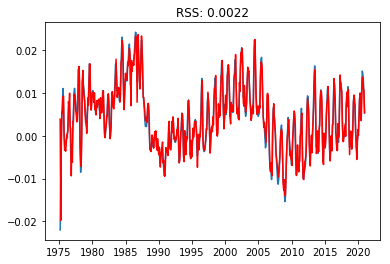

In [81]:
model414 = ARIMA(ts_log, order=(4,1,4))
results414 = model414.fit()
plt.plot(ts_log_diff)
plt.plot(results414.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results414.fittedvalues-ts_log_diff)**2))

In [82]:
results414.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(4, 1, 4)   Log Likelihood                2735.516
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sat, 12 Jun 2021   AIC                          -5451.033
Time:                        09:48:59   BIC                          -5407.916
Sample:                    02-28-1975   HQIC                         -5434.185
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0039      0.002      2.015      0.044       0.000       0.008
ar.L1.D.HPI     2.4588      0.143     17.206      0.000       2.179       2.739
ar.L2.D.HPI    -2.0966      0.377     -5.560      0.000      -2.836      -1.358
ar.L3.D.HPI     0.4924      0.370      1.332      0.183      -0.232       1.217
ar.L4.D.HPI     0.1338      0.134      0.997      0.319      -0.129       0.397
ma.L1.D.HPI    -0.5229      0.134     -3.895      0.000      -0.786      -0.260
ma.L2.D.HPI    -0.9015      0.114     -7.919      0.000      -1.125      -0.678
ma.L3.D.HPI     0.4136      0.083      4.997      0.000       0.251       0.576
ma.L4.D.HPI     0.3381      0.093      3.647      0.000       0.156       0.520
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0404           -0.0000j            1.0404           -0.0000
AR.2            0.9073           -0.5255j            1.0485           -0.0835
AR.3            0.9073           +0.5255j            1.0485            0.0835
AR.4           -6.5369           -0.0000j            6.5369           -0.5000
MA.1            0.9963           -0.3766j            1.0651           -0.0575
MA.2            0.9963           +0.3766j            1.0651            0.0575
MA.3           -1.6079           -0.1472j            1.6147           -0.4855
MA.4           -1.6079           +0.1472j            1.6147            0.4855
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 0.0022')

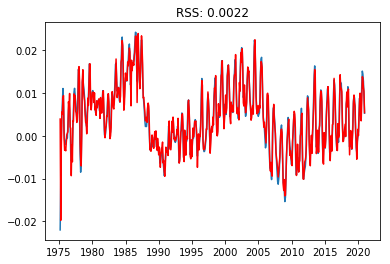

In [84]:
model314 = ARIMA(ts_log, order=(3,1,4))
results314 = model314.fit()
plt.plot(ts_log_diff)
plt.plot(results314.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results314.fittedvalues-ts_log_diff)**2))

In [85]:
results314.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(3, 1, 4)   Log Likelihood                2735.004
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sat, 12 Jun 2021   AIC                          -5452.007
Time:                        09:49:56   BIC                          -5413.202
Sample:                    02-28-1975   HQIC                         -5436.844
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0039      0.002      2.055      0.040       0.000       0.008
ar.L1.D.HPI     2.5999      0.026     99.389      0.000       2.549       2.651
ar.L2.D.HPI    -2.4712      0.050    -49.389      0.000      -2.569      -2.373
ar.L3.D.HPI     0.8610      0.027     32.460      0.000       0.809       0.913
ma.L1.D.HPI    -0.6532      0.047    -13.889      0.000      -0.745      -0.561
ma.L2.D.HPI    -0.7968      0.052    -15.257      0.000      -0.899      -0.694
ma.L3.D.HPI     0.4860      0.052      9.362      0.000       0.384       0.588
ma.L4.D.HPI     0.2510      0.045      5.526      0.000       0.162       0.340
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0420           -0.0000j            1.0420           -0.0000
AR.2            0.9141           -0.5283j            1.0558           -0.0834
AR.3            0.9141           +0.5283j            1.0558            0.0834
MA.1            0.9967           -0.3676j            1.0623           -0.0562
MA.2            0.9967           +0.3676j            1.0623            0.0562
MA.3           -1.3901           -0.0000j            1.3901           -0.5000
MA.4           -2.5396           -0.0000j            2.5396           -0.5000
-----------------------------------------------------------------------------
"""

In [88]:
# bringing things back to the original scale
predictions_ARIMA_diff = pd.Series(results513.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Year
1975-02-28    0.003731
1975-03-31   -0.020240
1975-04-30   -0.003971
1975-05-31    0.004773
1975-06-30    0.004994
dtype: float64


In [89]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Year
1975-02-28    0.003731
1975-03-31   -0.016510
1975-04-30   -0.020480
1975-05-31   -0.015707
1975-06-30   -0.010713
dtype: float64


In [90]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Year
1975-01-31    3.008155
1975-02-28    3.011885
1975-03-31    2.991645
1975-04-30    2.987674
1975-05-31    2.992448
dtype: float64

Text(0.5, 1.0, 'RMSE: 1.1671')

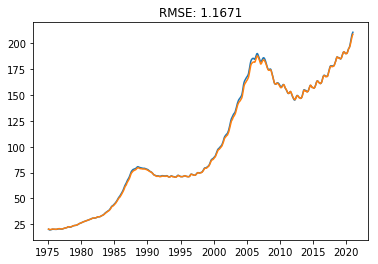

In [94]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [95]:
predictions_ARIMA.head()

Year
1975-01-31    20.250000
1975-02-28    20.325685
1975-03-31    19.918424
1975-04-30    19.839492
1975-05-31    19.934413
dtype: float64

In [98]:
fcast= results513.forecast(steps=6)

In [100]:
fcast


(array([5.35457087, 5.36055487, 5.36931013, 5.38077192, 5.39443121,
        5.40935201]),
 array([0.00165401, 0.00512339, 0.00923757, 0.01322825, 0.01692275,
        0.02036827]),
 array([[5.35132908, 5.35781267],
        [5.3505132 , 5.37059654],
        [5.35120483, 5.38741542],
        [5.35484503, 5.40669882],
        [5.36126323, 5.42759919],
        [5.36943094, 5.44927308]]))

_________________________________________

In [ ]:
noise.plot()

In [ ]:
trend.plot()

In [ ]:
sm.tsa.adfuller(df_ny.HPI)

In [ ]:
df_ny['pct_chg'] = df_ny.HPI.pct_change()*100
df_ny['lagged_pchg'] = df_ny.pct_chg.shift()
df_ny['lagged_hpi'] = df_ny.HPI.shift()
df_ny.head()

In [ ]:
df_ny = df_ny.dropna()
df_ny.head()

In [ ]:
sts.adfuller(df_ny.pct_chg)

In [ ]:
# decomposed = sm.tsa.seasonal_decompose(df_ny.HPI, model="additive", period=24)

In [ ]:
# decomposed.plot()

In [ ]:
sgt.plot_acf(df_ny['pct_chg'], lags=15, zero=False)

In [ ]:
sgt.plot_pacf(df_ny['pct_chg'], lags=15, zero=False, method=('ols'))

In [ ]:
y=df_ny['pct_chg']
y

In [ ]:
size = int(len(df_ny)*0.8)

train, test = df_ny.iloc[:size], df_ny.iloc[size:]

In [ ]:
print(y_train)
print(y_test)

In [ ]:
start_date = '2011-11-30'
end_date = '2020-12-31'

In [ ]:
# Create train and test sets for dependent and independent variables
X_train = train["lagged_hpi"].to_frame()
y_train = train["HPI"]
X_test = test["lagged_hpi"].to_frame()
y_test = test["HPI"]

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# Construct a dataframe using just the "y" training data:
out_of_sample_results = y_test.to_frame()

# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

In [ ]:
 # Plot the out-of-sample results for 2019
out_of_sample_results.plot(subplots=True)

In [ ]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["HPI"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

In [ ]:
quarters = df_ny.index.to_period('Q').unique()
quarters

In [ ]:
start_of_training_period = quarters[0].start_time.strftime(format="%Y-%m-%d")
start_of_training_period

In [ ]:
training_window = 15

In [ ]:
end_of_training_period = quarters[training_window + 0].end_time.strftime(format="%Y-%m-%d")
end_of_training_period

In [ ]:
test_qtr = quarters[training_window + 0 + 1]
test_qtr

In [ ]:
# The first day of the test week
start_of_test_qtr  = test_qtr.start_time.strftime(format="%Y-%m-%d")
start_of_test_qtr

In [ ]:
# The last day of the test week
end_of_test_qtr = test_qtr.end_time.strftime(format="%Y-%m-%d")
end_of_test_qtr

In [ ]:
# Training data with just one window
train = df_ny[start_of_training_period:end_of_training_period]
train

In [ ]:
test = df_ny[start_of_test_qtr:end_of_test_qtr]
test

In [ ]:
timeframe = len(quarters) - training_window - 1 
timeframe

In [ ]:
 # Construct an empty placeholder DataFrame, with a column named "Out-of-Sample Predictions"
# (Each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_predictions

In [ ]:
# Construct a separate empty DataFrame for actual data
all_actuals = pd.DataFrame(columns=["Actual Returns"])
all_actuals

In [ ]:
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = quarters[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training window
    end_of_training_period = quarters[training_window + i].end_time.strftime(format="%Y-%m-%d")

    # Window of test-window data
    test_qtr = quarters[training_window+i+1]
    
    # String of testing window
    start_of_test_qtr  = test_qtr.start_time.strftime(format="%Y-%m-%d")
    end_of_test_qtr = test_qtr.end_time.strftime(format="%Y-%m-%d")
    
    train = df_ny[start_of_training_period:end_of_training_period]
    test = df_ny[start_of_test_qtr:end_of_test_qtr]
    
    # Create new DataFrames:
    X_train = train["lagged_hpi"].to_frame()
    y_train = train["HPI"]
    X_test = test["lagged_hpi"].to_frame()
    y_test = test["HPI"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
   
    # Create a temporary DataFrame to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Out-of-Sample Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test DataFrame, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
   
    # Append these two DataFrames (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)

In [ ]:
all_predictions.head()

In [ ]:
all_actuals.head()

In [ ]:
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.head()

In [ ]:
Results.plot(subplots=True)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(
    Results["Actual Returns"],
    Results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

In [ ]:
df_ny.HPI.plot()

In [ ]:
df_ny.HPI.diff().diff().plot()

In [ ]:
df_ny.pct_chg.plot()

In [ ]:
df_ny.pct_chg.diff().plot()

In [ ]:
sgt.plot_pacf(df_ny.HPI, lags=30, zero=False, method=('ols'))

In [ ]:
sgt.plot_acf(df_ny.HPI, lags=30, zero=False)

In [ ]:
sgt.plot_pacf(df_ny.pct_chg[1:], lags=30, zero=False, method=('ols'))

In [ ]:
sgt.plot_acf(df_ny.pct_chg[1:], lags=30, zero=False)

In [ ]:
all_actuals.head()

In [ ]:
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.head()

In [ ]:
Results.plot(subplots=True)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(
    Results["Actual Returns"],
    Results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")